## DATA MINING PROJECT
# ABCDEats Inc\. Final Report

**Group 20** <br>
Afonso Gamito, 20240752 <br>
Gonçalo Pacheco, 20240695 <br>
Hassan Bhatti, 20241023 <br>
Moeko Mitani, 20240670

# Import the Libraries and CVS file

In [4]:
import pandas as pd
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from math import ceil

from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import CVS file
file_path = 'project_data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)

# 1. Check the DataFrame

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Metadata

The training set contains the customer data from ABCDEats Inc. collected over three months from three cities.

| Feature | Feature description |
|---------|---------------------|
| *customer_id* | Unique identifier for each customer.|
| *customer_region* | Geographic region where the customer is located.|
| *customer_age* | Age of the customer.|
| *vendor_count* | Number of unique vendors the customer has ordered from.|
| *product_count* | Total number of products the customer has ordered.|
| *is_chain* | Indicates whether the customer’s order was from a chain restaurant.|
| *first_order* | Number of days from the start of the dataset when the customer first placed an order.|
| *last_order* | Number of days from the start of the dataset when the customer most recently placed an order.|
| *last_promo* | The category of the promotion or discount most recently used by the customer.|
| *payment_method* | Method most recently used by the customer to pay for their orders.|
| *CUI_American* | The amount in monetary units spent by the customer from the American cuisine.|
| *CUI_Asian* | The amount in monetary units spent by the customer from the Asian cuisine.|
|*CUI_Beverages* | The amount in monetary units spent by the customer from the Beverages|
| *CUI_Cafe* | The amount in monetary units spent by the customer from the Cafe.|
| *CUI_Chicken Dishes* | The amount in monetary units spent by the customer from the Chicken Dishes.|
| *CUI_Chinese* | The amount in monetary units spent by the customer from the Chinese cuisine.|
| *CUI_Desserts* | The amount in monetary units spent by the customer from the Desserts.|
| *CUI_Healthy* | The amount in monetary units spent by the customer from the Healthy cuisine.|
| *CUI_Indian* | The amount in monetary units spent by the customer from the Indian cuisine.|
| *CUI_Italian* | The amount in monetary units spent by the customer from the Italian cuisine.|
| *CUI_Japanese* | The amount in monetary units spent by the customer from the Japanese cuisine.|
| *CUI_Noodle Dishes* | The amount in monetary units spent by the customer from the Noodle Dishes.|
| *CUI_OTHER* | The amount in monetary units spent by the customer from the Other cuisine.|
| *CUI_Street Food / Snacks* | The amount in monetary units spent by the customer from the Street Food / Snacks.|
| *CUI_Thai* | The amount in monetary units spent by the customer from the Thai cuisine.|
| *DOW_0* | Number of orders placed on each day of Sunday.|
| *DOW_1* | Number of orders placed on each day of Monday.|
| *DOW_2* | Number of orders placed on each day of Tuesday.|
| *DOW_3* | Number of orders placed on each day of Wednesday.|
| *DOW_4* | Number of orders placed on each day of Thursday.|
| *DOW_5* | Number of orders placed on each day of Friday.|
| *DOW_6* | Number of orders placed on each day of Saturday.|
| *HR_0* | Number of orders placed during 12AM.|
| *HR_1* | Number of orders placed during 1AM.|
| *HR_2* | Number of orders placed during 2AM.|
| *HR_3* | Number of orders placed during 3AM.|
| *HR_4* | Number of orders placed during 4AM.|
| *HR_5* | Number of orders placed during 5AM.|
| *HR_6* | Number of orders placed during 6AM.|
| *HR_7* | Number of orders placed during 7AM.|
| *HR_8* | Number of orders placed during 8AM.|
| *HR_9* | Number of orders placed during 9AM.|
| *HR_10* | Number of orders placed during 10AM.|
| *HR_11* | Number of orders placed during 11AM.|
| *HR_12* | Number of orders placed during 12PM.|
| *HR_13* | Number of orders placed during 1PM.|
| *HR_14* | Number of orders placed during 2PM.|
| *HR_15* | Number of orders placed during 3PM.|
| *HR_16* | Number of orders placed during 4PM.|
| *HR_17* | Number of orders placed during 5PM.|
| *HR_18* | Number of orders placed during 6PM.|
| *HR_19* | Number of orders placed during 7PM.|
| *HR_20* | Number of orders placed during 8PM.|
| *HR_21* | Number of orders placed during 9PM.|
| *HR_22* | Number of orders placed during 10PM.|
| *HR_23* | Number of orders placed during 11PM.|

# 2. Treat Missing Values
## Remarks from first delivery
- **'customer_age'**: 727 (NaN)
- **'first_order'**: 106 (NaN)
- **'HR_0'**: 1165 (NaN)
- **'customer_region'**: 442 (-)
- **'last_promo'**: 16748 (-) --> Exaggerated number of missing values. It need to consider about this later.

In [8]:
df.shape

(31888, 56)

In [9]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [10]:
# Fill missing values in customer age with its median
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].median())

In [11]:
# Fill missing values in first_order with its median
df["first_order"] = df["first_order"].fillna(df["first_order"].median())

In [12]:
# Check HR_0 
df["HR_0"].unique()

array([ 0., nan])

In [13]:
# Fill missing values in HR_0 with 0
df["HR_0"] = df["HR_0"].fillna(df["HR_0"].fillna(0))

In [14]:
# Check customer_region
df["customer_region"].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [15]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

From the visualization, "-" seems like to be able to be considered as City C (starting with 8000). Thus, we can fill the missing value "-" with "8000" for now since we will merge it with "8670", "8370" and "8550".

In [16]:
# Fill missing values "-" in customer_region with 8000
df["customer_region"] = df["customer_region"].replace("-", '8000')

In [17]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
8000     442
8550      26
Name: count, dtype: int64

In [18]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

Since there are 16748 of "-" in last_promo, we decided to rename it to "UNKNOWN" for now. Additionally, we might drop the feature itself later.

In [19]:
# Fill missing values "-" in last_prom with UNKNOWN
df["last_promo"] = df["last_promo"].replace("-", "UNKNOWN")

In [20]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
UNKNOWN     16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [21]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

# 3. Change the dtype
## Remarks
- **'customer_age'** should be int instead of float.
- **'is_chain'** should be bool instead of int because we agreed with METADATA.
- **'first_order'** should be int instead of float.
- **'HR_0'** should be int instead of float.

In [22]:
df["customer_age"] = df["customer_age"].astype("int")

In [23]:
df["first_order"] = df["first_order"].astype("int")

In [24]:
df["HR_0"] = df["HR_0"].astype("int")

In [25]:
df['is_chain'] = df['is_chain'].apply(lambda x: 1 if x != 0 else 0)

In [26]:
df["is_chain"] = df["is_chain"].astype("object")
#Replace True with 1 and False with 0

## Treat Duplicates

In [27]:
df.duplicated().sum()

np.int64(13)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

np.int64(0)

# 5. Visualizations

### Define metric and non-metric features. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31875 non-null  object 
 1   customer_region           31875 non-null  object 
 2   customer_age              31875 non-null  int64  
 3   vendor_count              31875 non-null  int64  
 4   product_count             31875 non-null  int64  
 5   is_chain                  31875 non-null  object 
 6   first_order               31875 non-null  int64  
 7   last_order                31875 non-null  int64  
 8   last_promo                31875 non-null  object 
 9   payment_method            31875 non-null  object 
 10  CUI_American              31875 non-null  float64
 11  CUI_Asian                 31875 non-null  float64
 12  CUI_Beverages             31875 non-null  float64
 13  CUI_Cafe                  31875 non-null  float64
 14  CUI_Chicken

In [31]:
# Define the list of non-metric features
non_metric_features = ['customer_region','is_chain',
    "customer_id", 
    "last_promo", 
    "payment_method"
]

# Extract metric features by excluding non-metric features from the DataFrame columns
metric_features = df.columns.drop(non_metric_features).to_list()

# Print the list of metric features
print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


## Histograms of Customer Age and Vendor Count

### Summary:
- Purpose: The histograms visualize the distribution of customer ages and the count of vendors, providing insight into the demographics of customers and vendor usage patterns.
- Choice of Chart: A histogram is suitable for displaying the frequency distribution of numeric data, allowing us to see the range, spread, and any potential peaks in the data for both customer_age and vendor_count.
- Findings: Key observations will depend on the data shape; for example, the age distribution might reveal customer age trends, and vendor count could indicate the typical range or average for vendor interaction per customer.

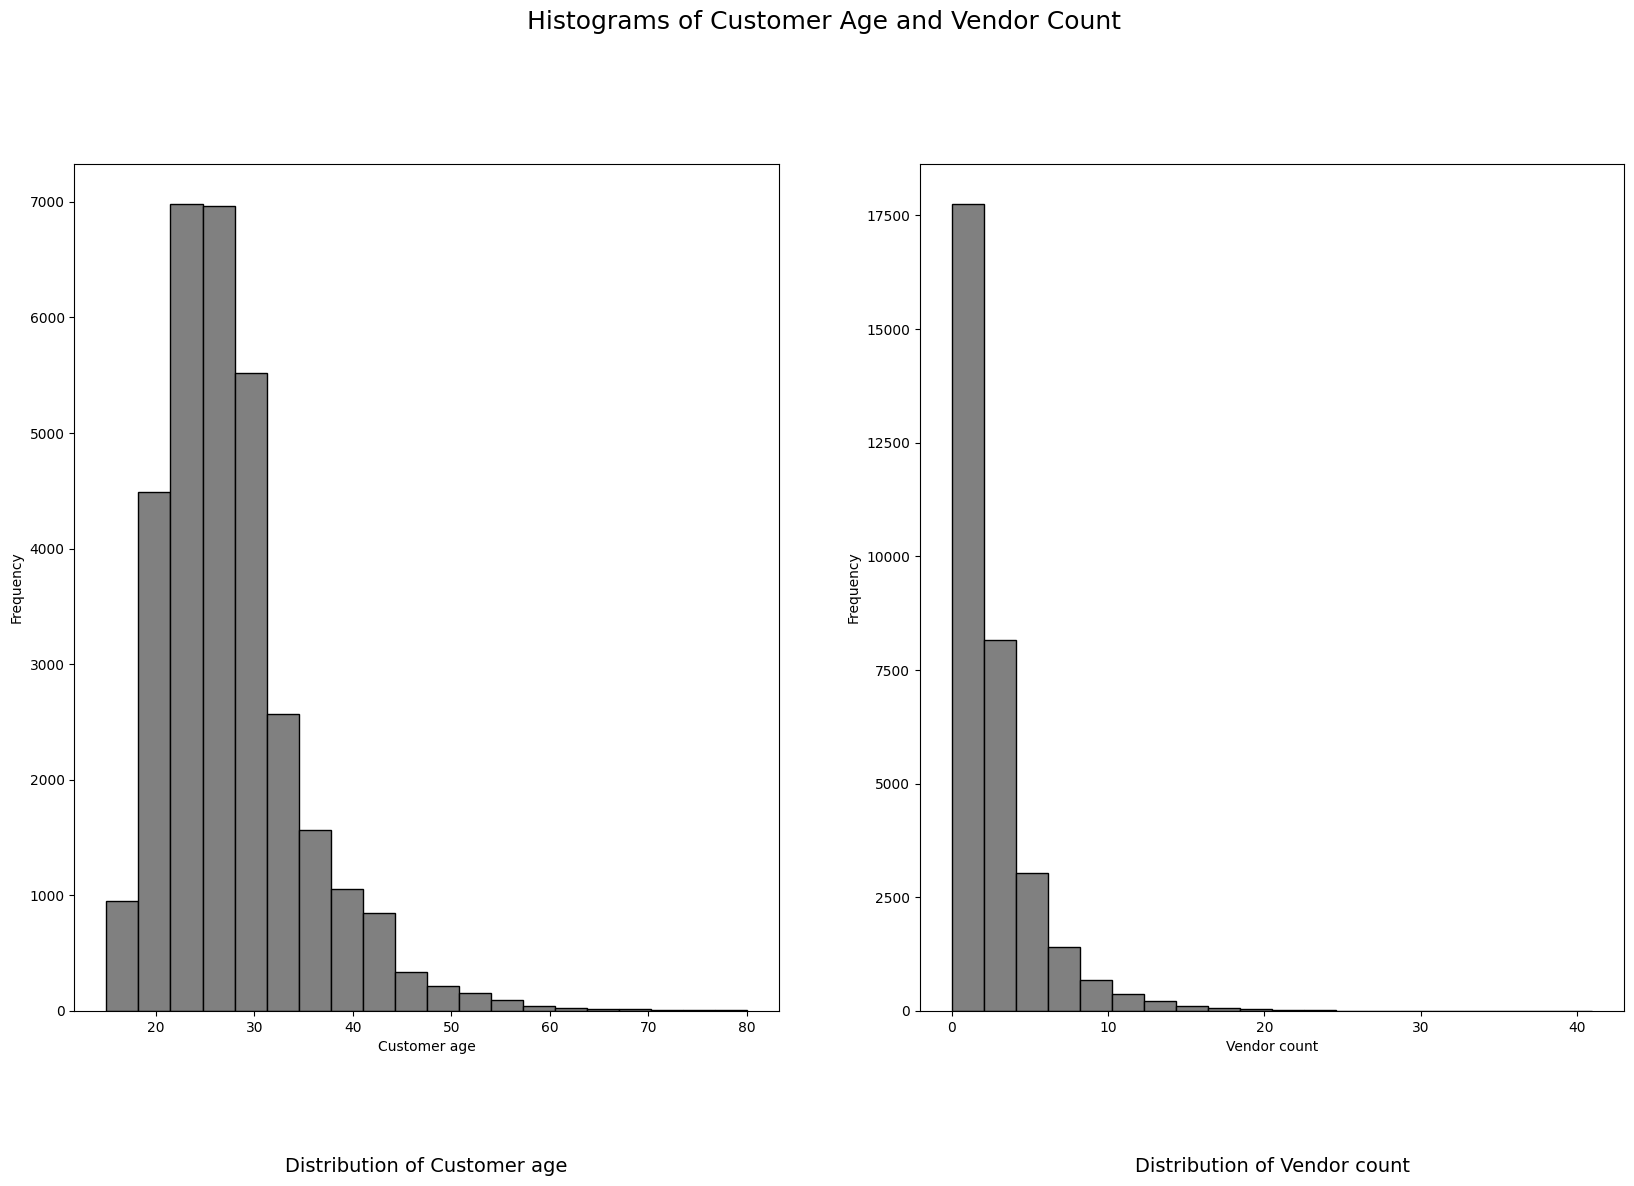

In [32]:
# Settings for subplots: number of rows and columns for the two features
sp_rows = 1
sp_cols = 2

# Prepare figure and create individual axes for each histogram
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data for 'customer_age' and 'vendor_count'
# Iterate over each axis and feature to plot histograms
for ax, feature in zip(axes.flatten(), ['customer_age', 'vendor_count']):
    # Plot histogram in shades of grey for each feature
    ax.hist(df[feature].dropna(), bins=20, color='grey', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.2)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Frequency")

# Main title for the figure
plt.suptitle("Histograms of Customer Age and Vendor Count", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as a high-quality PNG
plt.savefig(os.path.join(save_dir, 'customer_age_vendor_count_histograms.png'), dpi=200, bbox_inches='tight')

# Display the plot
plt.show()

## Histograms of First and Last Order Dates

### Summary:
- Purpose: The histograms of first_order and last_order illustrate the distribution of customer order initiation and most recent orders, providing insights into how customer activity may vary over time.
- Choice of Chart: A histogram helps to visualize the frequency and spread of these dates, which is essential for observing order patterns, such as seasonality or customer retention.
- Findings: The peaks indicate popular order periods or gaps suggesting low activity. Observing distributions of both features side-by-side allows comparison and can highlight any shifts in ordering trends over time.

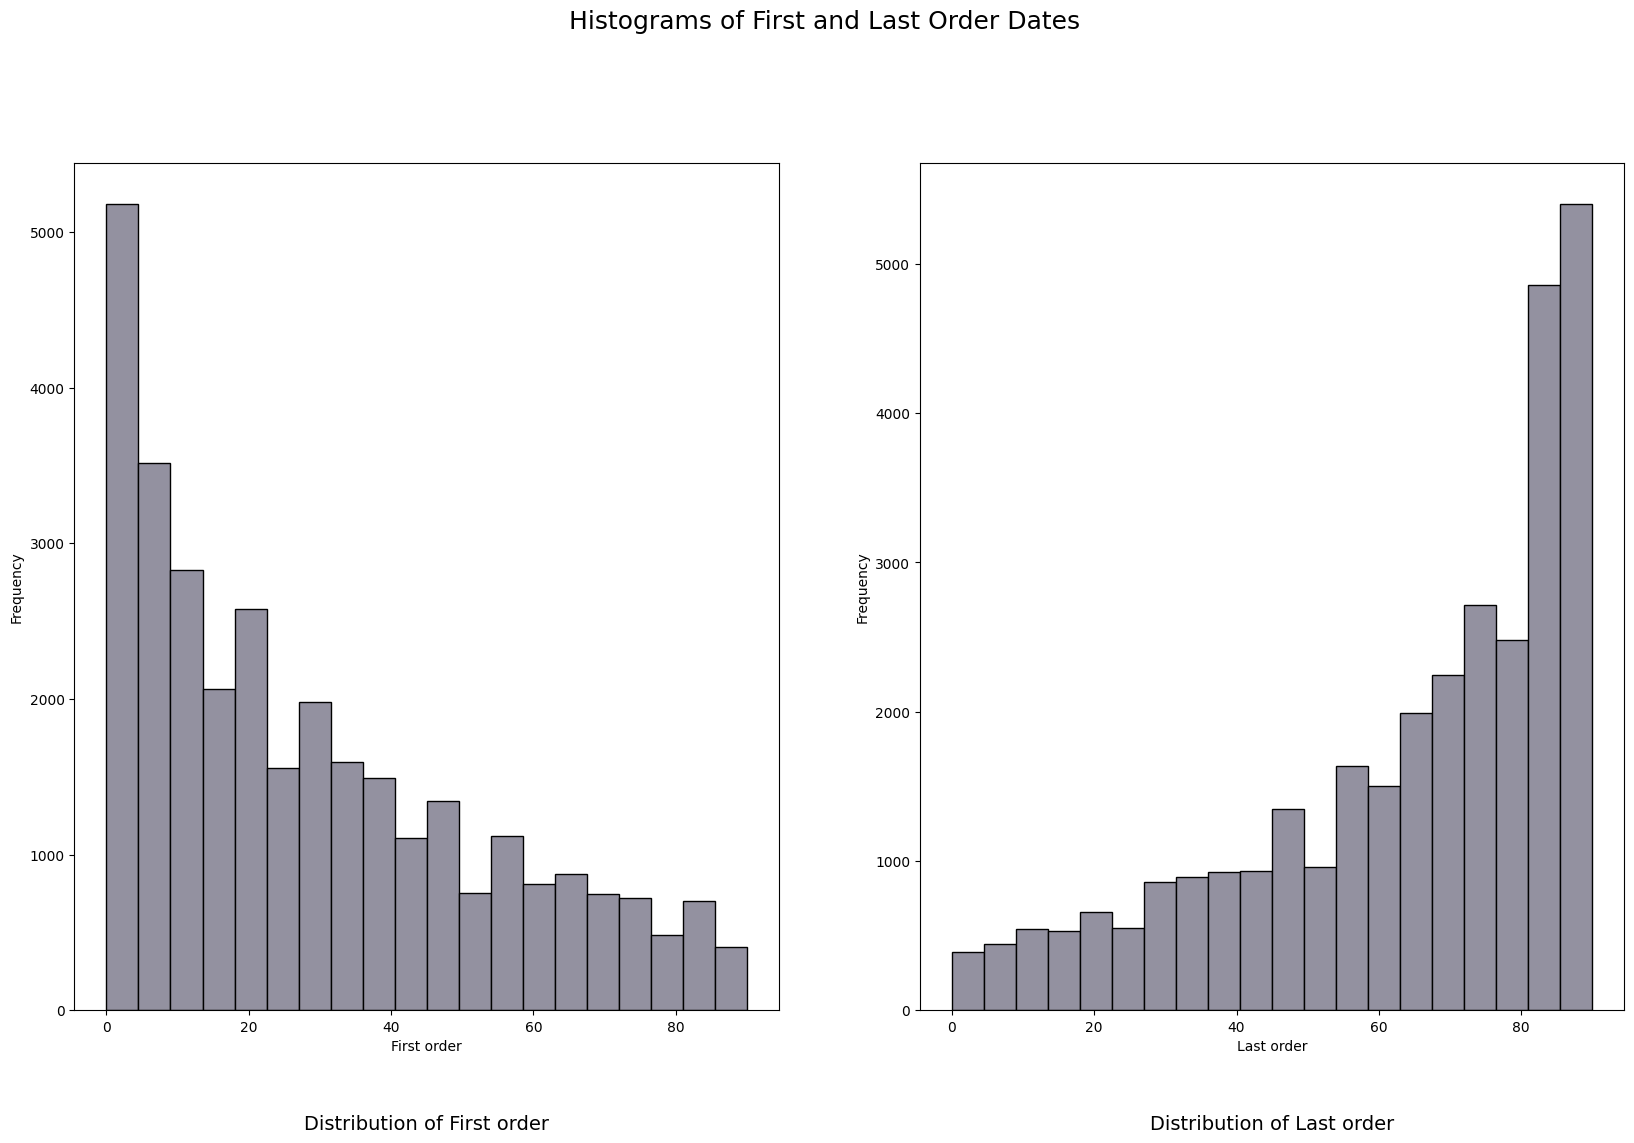

In [33]:
# Settings for subplots: Define rows and columns (if planning to add more histograms, this setting can be adjusted)
fig, axes = plt.subplots(1, 2, figsize=(20, 11))  # 1 row, 2 columns for two variables

# Plot histograms for 'first_order' and 'last_order'
for ax, feature in zip(axes.flatten(), ['first_order', 'last_order']):
    # Plot histogram with a grey color for both features
    ax.hist(df[feature].dropna(), bins=20, color='#9391A0', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.15)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Frequency")

# Main title for the figure, reflecting the context of the chart
plt.suptitle("Histograms of First and Last Order Dates", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as a high-quality PNG file
plt.savefig(os.path.join(save_dir, 'first_last_order_histograms.png'), dpi=200, bbox_inches='tight')

# Display the plot
plt.show()

## Bar Chart of Unique Customer Count by Region
### Summary for Unique Customer Count by Region:
- This bar chart illustrates the number of unique customers segmented by customer regions.
- The x-axis shows the different regions, while the y-axis indicates the count of unique customers from each region.
- This visualization helps identify regions with higher customer engagement and potential market opportunities.

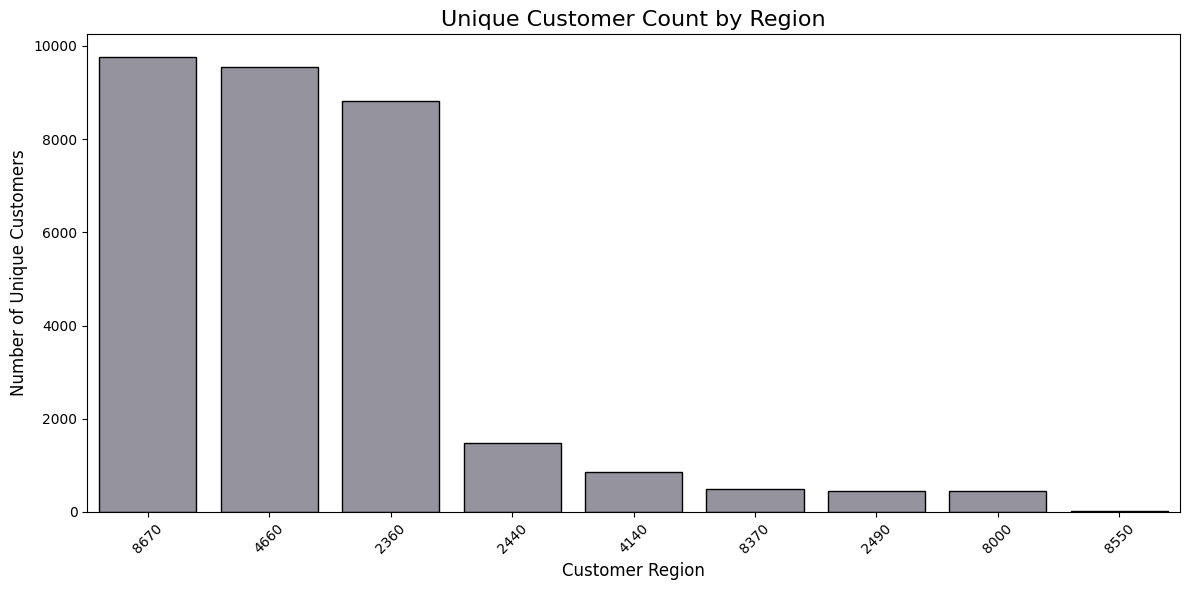

In [34]:
# Calculate unique customer count per region
region_customer_counts = df.groupby('customer_region')['customer_id'].nunique().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size for visibility
sns.barplot(x=region_customer_counts.index, y=region_customer_counts.values, color='#9391A0', edgecolor='black')  # Create the bar plot
plt.title('Unique Customer Count by Region', fontsize=16)  # Title for context
plt.xlabel('Customer Region', fontsize=12)  # X-axis label
plt.ylabel('Number of Unique Customers', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

### Box Plots

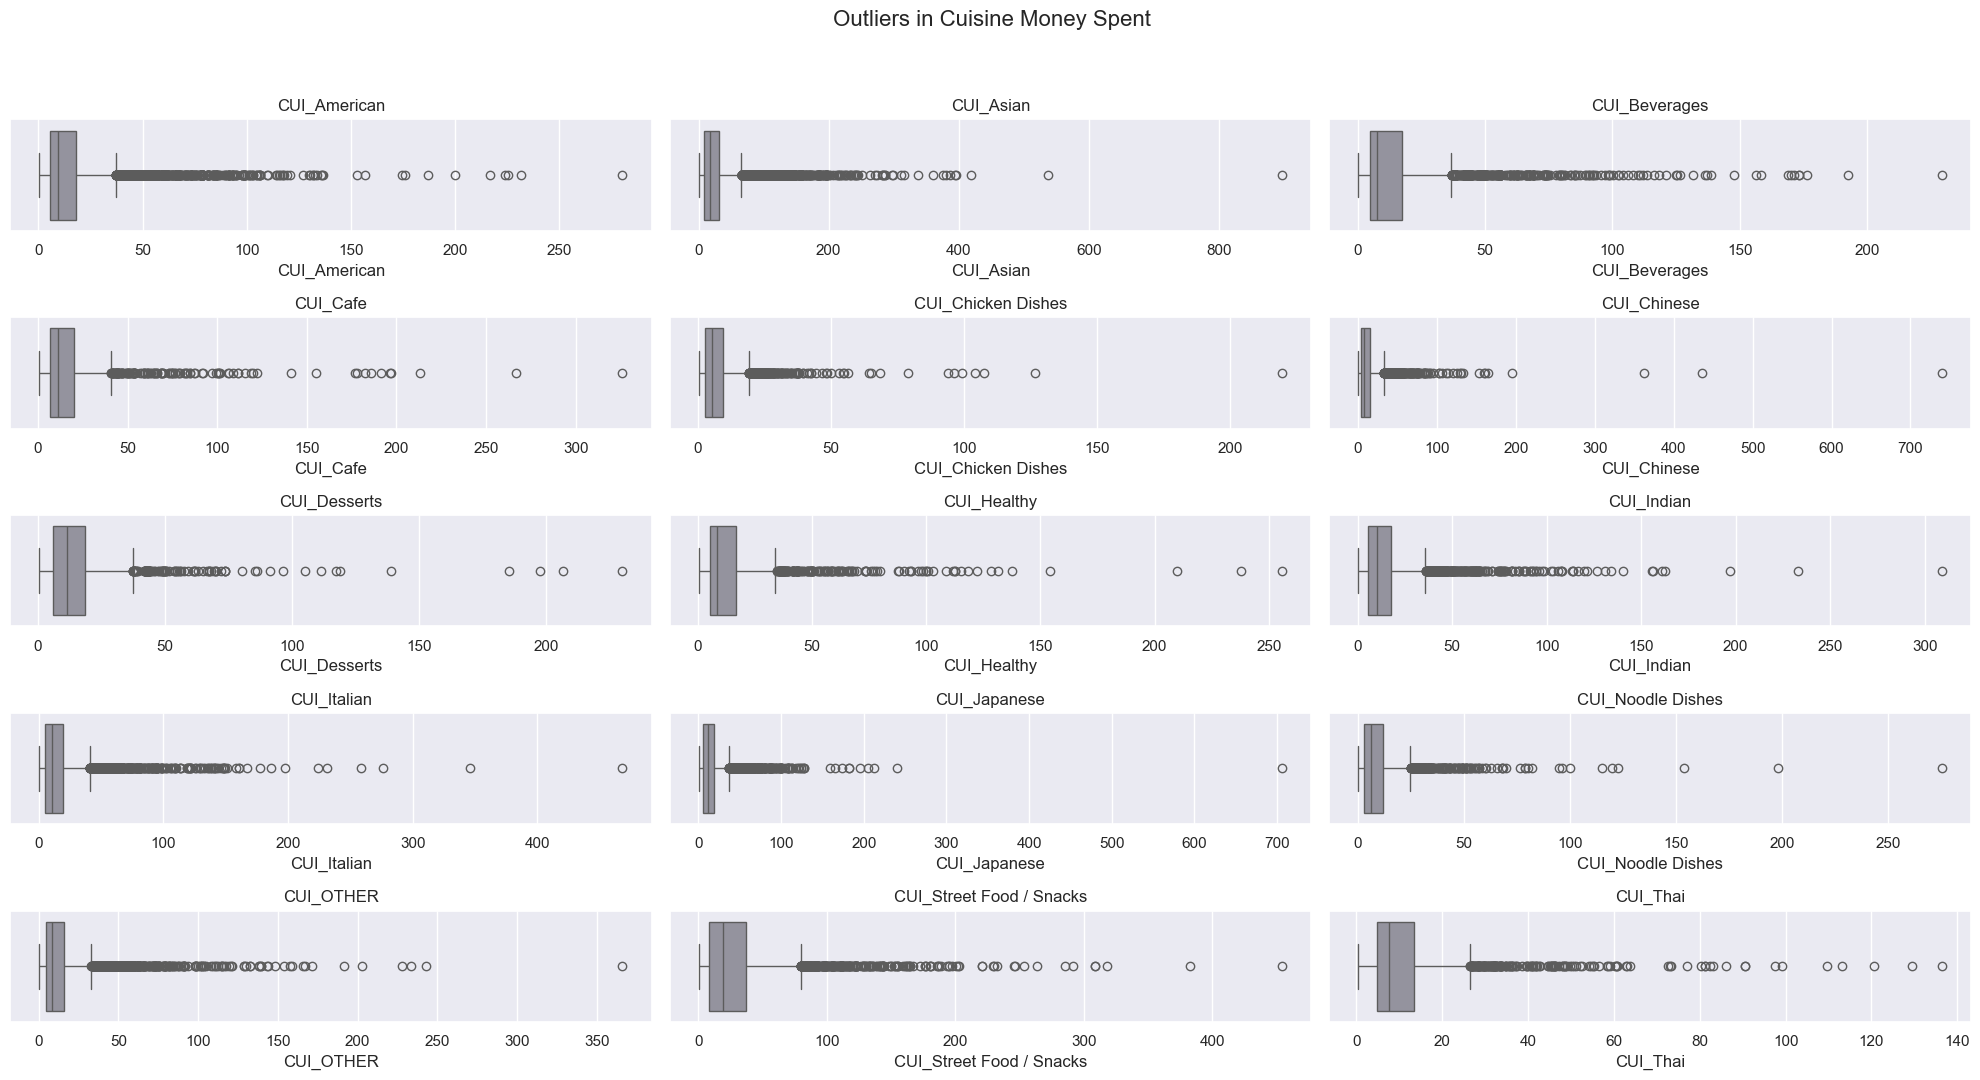

In [35]:
# Step 1: List of features for which you want to plot boxplots
metric_features = [col for col in df.columns if 'CUI_' in col]

# Step 2: Filter valid columns to avoid errors
valid_features = [feat for feat in metric_features if feat in df.columns]

# Step 3: Set Seaborn style for better aesthetics
sns.set()

# Step 4: Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)  # Calculate the number of columns needed

# Step 5: Prepare figure and axes for subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)  # Size of the figure
                        )

# Step 6: Flatten axes array in case it is 2D for easier iteration
axes = axes.flatten()

# Step 7: Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    # Filter out 0s from the feature
    data = df[feat].replace(0, float('nan'))  # Replace 0s with NaN (ignoring them in boxplot)
    
    # Plot the boxplot only for non-zero values
    sns.boxplot(x=data, ax=ax, color="#9391A0")  # Use grey color for the boxplots
    ax.set_title(feat)  # Set title for each subplot to indicate the feature being plotted

# Step 8: Remove any extra empty subplots if there are any
for ax in axes[len(valid_features):]:
    ax.remove()

# Step 9: Layout adjustments
title = "Outliers in Cuisine Money Spent"
plt.suptitle(title, fontsize=16)  # Main title for the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the main title
plt.show()

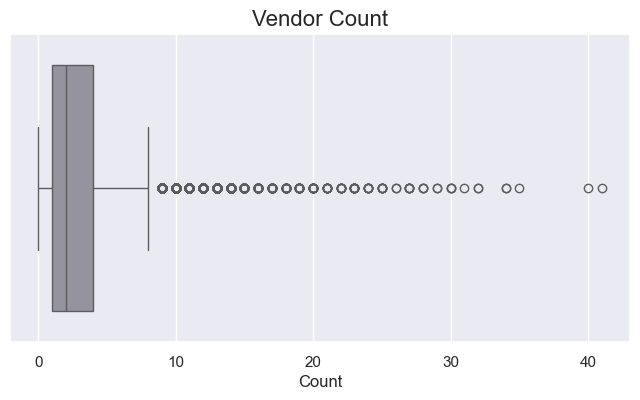

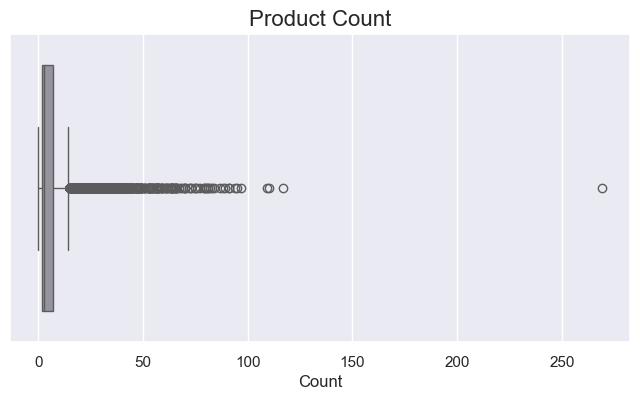

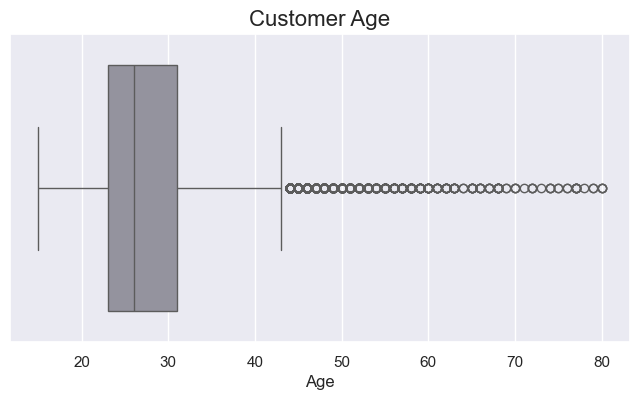

In [36]:
# Step 1: Plot Vendor Count
plt.figure(figsize=(8, 4))  # Set the figure size for the plot
sns.boxplot(x=df['vendor_count'], orient='h', color="#9391A0")  # Create a horizontal boxplot for vendor count
plt.title('Vendor Count', fontsize=16)  # Title for context
plt.xlabel('Count', fontsize=12)  # X-axis label
plt.show()  # Display the plot

# Step 2: Plot Product Count
plt.figure(figsize=(8, 4))  # Set the figure size for the plot
sns.boxplot(x=df['product_count'], orient='h', color="#9391A0")  # Create a horizontal boxplot for product count
plt.title('Product Count', fontsize=16)  # Title for context
plt.xlabel('Count', fontsize=12)  # X-axis label
plt.show()  # Display the plot

# Step 3: Plot Customer Age
plt.figure(figsize=(8, 4))  # Set the figure size for the plot
sns.boxplot(x=df['customer_age'], orient='h', color="#9391A0")  # Create a horizontal boxplot for customer age
plt.title('Customer Age', fontsize=16)  # Title for context
plt.xlabel('Age', fontsize=12)  # X-axis label
plt.show()  # Display the plot

# 5. Outliers
### Remarks for Outliers in Cuisine Money Spent
- This figure presents boxplots for each cuisine in money spent
- Box plots are chosen for their effectiveness in visualizing the distribution of data and identifying outliers.
- The use of a consistent gray color allows for a cohesive and professional look.
- This visualization assists in understanding the variability of money spent in each cuisine and identifying any extreme values.

### Remarks for Vendor Count:
- This box plot visualizes the distribution of vendor counts across the dataset.
- It highlights the median, quartiles, and potential outliers in vendor count values,
- allowing for a clear understanding of vendor count variability.

### Remarks for Product Count:
- This box plot illustrates the distribution of product counts within the dataset.
- It shows the central tendency, variability, and any outliers in product counts.
- Providing insights into how product availability varies across vendors.

### Remarks for Customer Age:
- This box plot represents the distribution of customer ages in the dataset.
- It highlights the median age, the interquartile range, and any potential outliers.
- Offering insights into the age demographics of customers interacting with the vendors.

In [37]:
filters = (
    (df['CUI_American'] <= 150) &
    (df['CUI_Asian'] <= 300) &
    (df['CUI_Beverages'] <= 125) &
    (df['CUI_Cafe'] <= 125) &
    (df['CUI_Chicken Dishes'] <= 60) &
    (df['CUI_Chinese'] <= 150) &
    (df['CUI_Desserts'] <= 75) &
    (df['CUI_Healthy'] <= 80) &
    (df['CUI_Indian'] <= 110) &
    (df['CUI_Italian'] <= 160) &
    (df['CUI_Japanese'] <= 150) &
    (df['CUI_Noodle Dishes'] <= 75) &
    (df['CUI_OTHER'] <= 125) &
    (df['CUI_Street Food / Snacks'] <= 200) &
    (df['CUI_Thai'] <= 60) 
)

df_filtered = df[filters]

print('Percentage of data kept after removing outliers:', np.round(df_filtered.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.993


In [38]:
filters = (
    (df['vendor_count'] <= 30) &
    (df['product_count'] <= 100)
)

df_filtered = df[filters]

print('Percentage of data kept after removing outliers:', np.round(df_filtered.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9997


# 6. Key statistics summary

## Remarks
- **Customer Age**: The mean of 'customer_age' is 27.5. 25% of the customers are 23 or younger, and 75% are 32 or younger. Thus, young people tend to use our food delivery services.
- **Vender Number**: The mean of 'vendor_count' is 3.1. 25% of the customers have ordered from one vendor, 50% have ordered from two vendors, and 75% have ordered from four vendors. Thus, most of the customers have ordered from less than four vendors in three months.
- **Product Number**: The mean of 'product_count' is 5.67. 25% of the customers have ordered two products, 50% have ordered three products, and 75% have ordered seven products in three months. There is a high standard deviation of 6.96, reflecting significant variability in order volume.
- **Chain Restaurant Number**: DISAGREE WITH METADATA. The values should be converted to boolean in the next process.
- **Date of First Order and Last Order**: It is unclear whether these features will be useful in our analysis. It is still undecided, but it should be converted to a different presentation method if we use them.
- **Payment Methods**: Most customers pay by card rather than by cash or digital.
- **Customer Region**: There are eight different regions. There should be three cities instead, so it seems like they are postal codes. Then we can categorize them into three groups (cities): city A (2360, 2440 and 2490), city B (4660 and 4140), and city C (8670, 8370 and 8550) in the next process.
- **Order Numbers per Regions**: The region with the highest number of orders was 8670, followed by 4660 and 2360, far ahead of the other regions. The region 8670 had the highest number of unique customers who placed orders, followed by 4660 and 2360.
# 7. Trends
- **Young Customers**: The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 18 and 32.
- **Payment by Card**: Most customers pay by card rather than by cash or digital.
- **Popular Cuisine**: American and Asian dishes emerge as the most popular choices.
- **Popular Cuisine per Regions**: Asian cuisine is the most popular in region 8670, while Italian cuisine leads in region 4660. This trend is consistent across other city regions, though with significant variation in total order volumes. In region 4140, however, the popularity of these cuisines is less pronounced compared to the two largest regions. City A shows greater diversity in cuisine preferences than the other two cities.
- **Busier Day of The Week**: Peak food ordering on Thursdays (DOW_4) and Saturdays (DOW_6).
- **Busier Hours**: High demand occurs from 10:00 AM to 12:00 PM and 4:00 PM to 6:00 PM.
- **Customer Frequency**: Most of the customers stay for two to three days, this short engagement period suggests that customers may use the service sporadically rather than consistently over extended periods.

In [39]:
df.describe() # Provides a summary of key statistics

,customer_age,vendor_count,product_count,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.0,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,27.473161,3.102714,5.668424,28.448408,63.672376,4.877205,9.955306,2.298224,0.801490,0.768409,1.431801,0.884719,0.950590,1.631818,3.234729,2.996031,0.711966,3.001137,3.910391,0.842040,0.555922,0.567561,0.590933,0.619388,0.677867,0.652957,0.704408,0.0,0.053835,0.063153,0.118306,0.101710,0.081914,0.069616,0.076675,0.131859,0.233945,0.329663,0.378259,0.314259,0.236424,0.215686,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176
std,7.083258,2.771753,6.957933,24.067394,23.227992,11.647043,23.561492,8.475868,6.428422,3.657986,8.193374,5.260910,5.831747,7.444679,11.250094,10.182406,4.537359,9.770104,15.548367,4.433918,1.013634,1.044190,1.045900,1.069558,1.088284,1.069802,1.167592,0.0,0.317031,0.351490,0.497117,0.437549,0.358701,0.329307,0.377349,0.635603,0.725015,0.891312,0.960119,0.842625,0.637513,0.599098,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,219.660000,739.730000,230.07

In [40]:
df.describe(include = "object")

,customer_id,customer_region,is_chain,last_promo,payment_method
count,31875,31875,31875,31875,31875
unique,31875,9,2,4,3
top,1b8f824d5e,8670,1,UNKNOWN,CARD
freq,1,9761,25776,16744,20153


In [41]:
(df['payment_method'] == "DIGI").sum()

np.int64(6098)

In [42]:
(df['payment_method'] == "CASH").sum()

np.int64(5624)

# 8. New Feature Creation

## days_as_client

In [43]:
df['days_as_client'] = df['last_order'] - df['first_order']

## money_spent

In [44]:
cuisine_columns = [
    "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes",
    "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian",
    "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"
]                
df['money_spent'] = df[cuisine_columns].sum(axis=1)

## Customer_City

In [45]:
# Define a mapping for the regions
# Define a mapping for the regions with string keys
region_to_city = {
    '2360': 'City A', '2440': 'City A', '2490': 'City A',
    '4660': 'City B', '4140': 'City B',
    '8670': 'City C', '8370': 'City C', '8550': 'City C','8000':'City C'
}

# Create the new 'City' feature using map
df['Customer_City'] = df['customer_region'].map(region_to_city)

## total_orders

In [46]:
# List of columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create the 'total_order' feature as the sum of the specified columns
df['total_orders'] = df[columns_to_sum].sum(axis=1)
# Display the updated DataFrame

## average_purchase 

In [47]:
df['average_purchase'] = df['money_spent'] / df['total_orders']

## age_group

In [48]:
# Define age categories
bins = [0, 18, 35, 60, float('inf')]  # Age ranges
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

# Create new feature 'age_group'
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)

## morning_orders;  afternoon_orders;  evening_orders;  night_orders

In [49]:
# Define periods of the day
morning_columns = ['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11']
afternoon_columns = ['HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17']
evening_columns = ['HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
night_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']

# Create new features by summing the orders in each period
df['morning_orders'] = df[morning_columns].sum(axis=1)
df['afternoon_orders'] = df[afternoon_columns].sum(axis=1)
df['evening_orders'] = df[evening_columns].sum(axis=1)
df['night_orders'] = df[night_columns].sum(axis=1)

## customer_frequency

In [50]:
# Calculate the percentiles
q1 = df['total_orders'].quantile(0.25)
q3 = df['total_orders'].quantile(0.75)

# Define thresholds based on percentiles
df['customer_frequency'] = pd.cut(df['total_orders'], 
                             bins=[-float('inf'), q1, q3, float('inf')], 
                             labels=['Infrequent', 'Moderate', 'Frequent'])

In [51]:
df.shape

(31875, 67)

In [52]:
df['customer_frequency'].value_counts()

customer_frequency
Infrequent    14260
Moderate      10477
Frequent       7138
Name: count, dtype: int64

In [53]:
Infrequent_counts = df[df['customer_frequency'] == 'Infrequent']['total_orders'].value_counts()
print(Infrequent_counts)

total_orders
2    7214
1    6908
0     138
Name: count, dtype: int64


In [54]:
clients_with_zero_orders = df[df['total_orders'] == 0]
clients_with_zero_orders

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_client,money_spent,Customer_City,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency
1449,4903041977,8670,22,0,0,1,1,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
1476,c94b288475,8670,26,0,0,0,1,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
1488,f687717dc1,8670,21,0,0,1,1,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
2486,c6cf0b76fb,8670,38,0,0,0,2,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Adult,0,0,0,0,Infrequent
3391,1b7c34738e,8670,24,0,0,0,3,3,UNKNOWN,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
3405,5ccdf6c889,8670,25,0,0,0,3,3,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
6201,eff3f98046,8670,32,0,0,0,6,6,UNKNOWN,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
7123,376f896388,8670,29,0,0,1,7,7,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent
7152,8a7b681c19,8670,17,0,0,1,7,7,UNKNOWN,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Child,0,0,0,0,Infrequent
7166,a2b54d0827,8670,24,0,0,1,7,7,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,City C,0,NaN,Young Adult,0,0,0,0,Infrequent


In [55]:
df.drop(df[df['total_orders'] == 0].index, inplace=True)

In [56]:
df.shape

(31737, 67)

In [57]:
Moderate_counts = df[df['customer_frequency'] == 'Moderate']['total_orders'].value_counts()
print(Moderate_counts)

total_orders
3    5097
4    3168
5    2212
Name: count, dtype: int64


In [58]:
frequent_counts = df[df['customer_frequency'] == 'Frequent']['total_orders'].value_counts()
print(frequent_counts)

total_orders
6     1492
7     1142
8      829
9      648
10     498
11     412
12     313
13     258
14     234
15     189
16     154
17     124
19      99
18      99
20      84
21      68
22      64
23      49
24      45
25      40
26      36
27      30
30      24
28      20
31      18
29      16
32      16
36      12
33      12
35       9
37       9
34       8
43       7
47       7
42       7
41       7
39       6
54       5
44       4
60       3
53       3
51       3
38       3
62       2
50       2
40       2
61       2
63       2
82       2
52       2
58       2
69       2
46       1
91       1
80       1
48       1
49       1
75       1
65       1
45       1
94       1
57       1
55       1
90       1
70       1
59       1
Name: count, dtype: int64


In [59]:
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

25th Percentile (Q1): 2.0
75th Percentile (Q3): 5.0


## Customer_preference


In [60]:
# Identify the column with the labeled value for each customer
# Define all cuisine columns explicitly

# Apply idxmax only to the cuisine columns
df['Customer_preference'] = df[cuisine_columns].apply(lambda row: row.idxmax(), axis=1)


## Frequency

In [61]:
df['Frequency'] = df['total_orders'] / 92
df.tail(30)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_client,money_spent,Customer_City,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,Customer_preference,Frequency
31858,cd8abe1950,8670,18,1,1,0,22,0,DELIVERY,DIGI,0.00,18.85,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22,18.85,City C,1,18.85,Young Adult,0,0,0,1,Infrequent,CUI_Asian,0.01087
31859,d068a522ef,2440,36,1,1,0,22,0,DELIVERY,DIGI,0.00,3.51,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-22,3.51,City A,1,3.51,Adult,0,0,1,0,Infrequent,CUI_Asian,0.01087
31860,d1803b5176,4660,24,1,1,1,22,0,DELIVERY,CASH,4.26,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-22,4.26,City B,1,4.26,Young Adult,0,1,0,0,Infrequent,CUI_American,0.01087
31861,d1a76d6972,8670,35,1,2,1,22,0,FREEBIE,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,24.86,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-22,24.86,City C,1,24.86,Adult,1,0,0,0,Infrequent,CUI_Street Food / Snacks,0.01087
31862,d35718adbf,8670,32,1,1,1,22,0,UNKNOWN,CARD,0.00,0.00,17.81,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22,17.81,City C,1,17.81,Young Adult,1,0,0,0,Infrequent,CUI_Beverages,0.01087
31863,d545ba3fc6,4660,24,1,1,1,22,0,DELIVERY,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,4.71,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-22,4.71,City B,1,4.71,Young Adult,0,1,0,0,Infrequent,CUI_Japanese,0.01087
31864,d7c27899dd,2360,22,1,2,0,22,0,DISCOUNT,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,10.2,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-22,10.20,City A,1,10.20,Young Adult,0,1,0,0,Infrequent,CUI_Indian,0.01087
31865,d89018cf1a,4660,21,1,1,1,22,0,FREEBIE,DIGI,14.53,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-22,14.53,City B,1,14.53,Young Adult,0,1,0,0,Infrequent,CUI_American,0.01087
31866,d98363a77b,2360,23,1,2,1,22,0,UNKNOWN,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,11.69,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-22,11.69,City A,1,11.69,Young Adult,0,1,0,0,Infrequent,CUI_Japanese,0.01087
31867,da94b8d58c,4660,30,1,1,1,22,0,UNKNOWN,CASH,21.64,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-22,21.64,City B,1,21.64,Young Adult,0,1,0,0,Infrequent,CUI_American,0.01087


In [62]:
df['Frequency'].value_counts()

Frequency
0.021739    7214
0.010870    6908
0.032609    5097
0.043478    3168
0.054348    2212
0.065217    1492
0.076087    1142
0.086957     829
0.097826     648
0.108696     498
0.119565     412
0.130435     313
0.141304     258
0.152174     234
0.163043     189
0.173913     154
0.184783     124
0.195652      99
0.206522      99
0.217391      84
0.228261      68
0.239130      64
0.250000      49
0.260870      45
0.271739      40
0.282609      36
0.293478      30
0.326087      24
0.304348      20
0.336957      18
0.315217      16
0.347826      16
0.391304      12
0.358696      12
0.402174       9
0.380435       9
0.369565       8
0.510870       7
0.467391       7
0.456522       7
0.445652       7
0.423913       6
0.586957       5
0.478261       4
0.413043       3
0.576087       3
0.554348       3
0.652174       3
0.630435       2
0.434783       2
0.543478       2
0.663043       2
0.673913       2
0.684783       2
0.891304       2
0.565217       2
0.750000       2
0.815217       1
0.53

# 8.1 Visualizations with the new features

## Histogram of Customer Days as Client

### Summary for Distribution of Client Duration:
- This histogram illustrates the frequency distribution of the duration (in days) that clients have been active.
- The x-axis represents the number of days, while the y-axis shows how many clients fall into each duration range.
- This visualization helps to identify typical client lifespans and patterns in client retention.

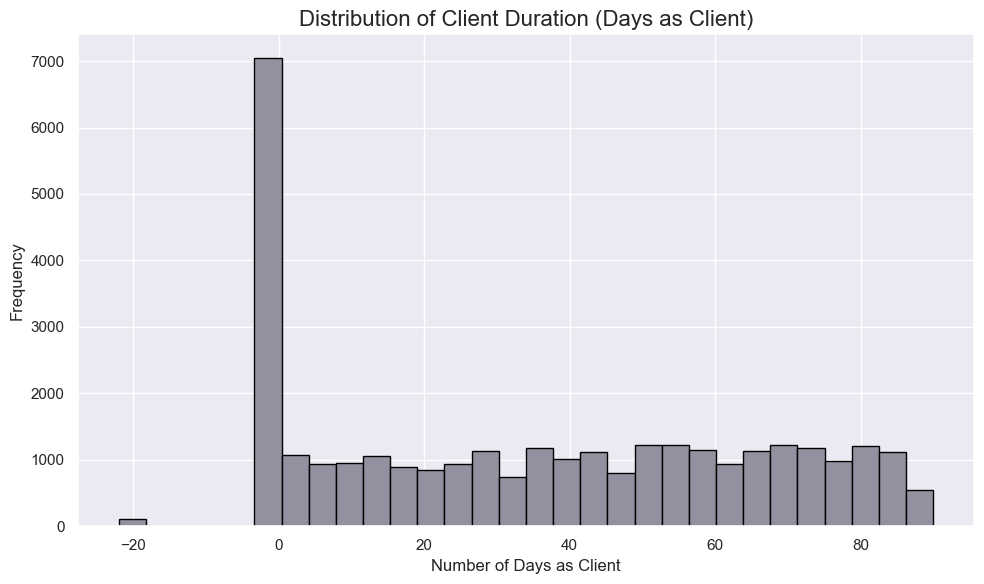

In [63]:
# Calculate the difference in days between the last and first order
df['days_as_client'] = df['last_order'] - df['first_order']

# Plotting the distribution of days as a client
plt.figure(figsize=(10, 6))  # Set the figure size for visibility
plt.hist(df['days_as_client'].dropna(), bins=30, color='#9391A0', edgecolor='black')  # Create histogram
plt.title("Distribution of Client Duration (Days as Client)", fontsize=16)  # Title for context
plt.xlabel("Number of Days as Client", fontsize=12)  # X-axis label
plt.ylabel("Frequency", fontsize=12)  # Y-axis label
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

## Bar Chart of Money Spent by Customer Region
### Summary for Money Spent by Customer Region:
- This bar chart shows the money spent segmented by customer regions.
- The x-axis lists the different regions, while the y-axis indicates the total money spent placed from each region.
- This visualization is useful for understanding regional preferences and sales distribution.

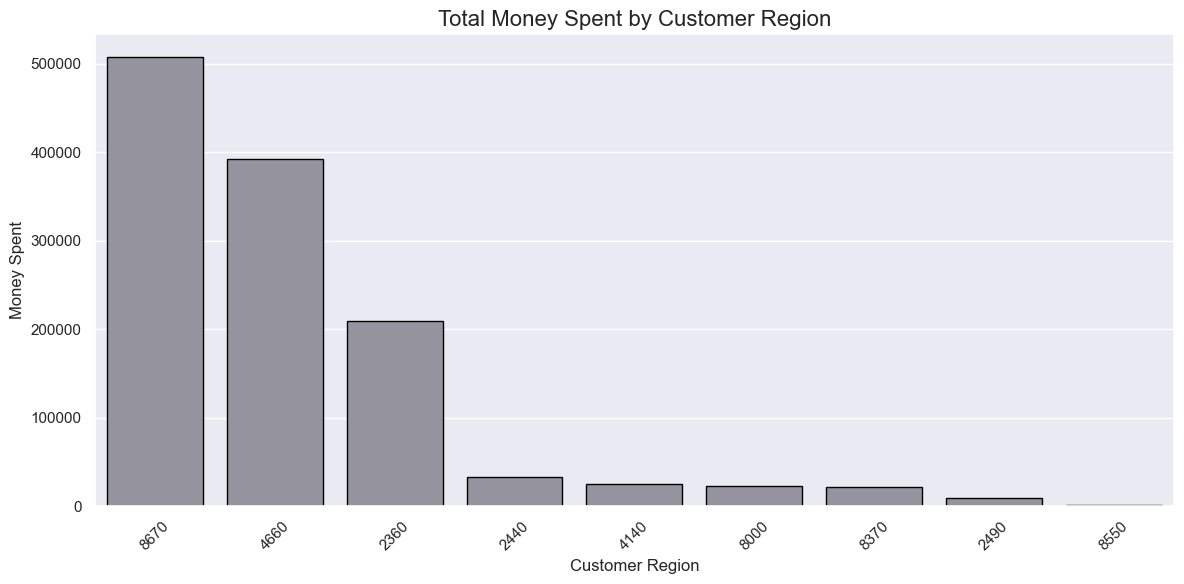

In [64]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df.columns if 'CUI_' in col]  # Replace with actual cuisine column names

# Calculate total money spent by summing across all cuisine columns
df['money_spent'] = df[cuisine_columns].sum(axis=1)

# Group data by customer region and calculate total orders for each region
region_orders = df.groupby('customer_region')['money_spent'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size for visibility
sns.barplot(x=region_orders.index, y=region_orders.values, color='#9391A0', edgecolor='black')  # Create the bar plot
plt.title('Total Money Spent by Customer Region', fontsize=16)  # Title for context
plt.xlabel('Customer Region', fontsize=12)  # X-axis label
plt.ylabel('Money Spent', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

## Bar Chart of Total Money Spent by Customer_City and Cuisine Type
### Summary for Total Money Spent by City and Cuisine Type:
- This bar chart illustrates the distribution of total money spent across different Cities, segmented by cuisine type.
- The x-axis shows the various regions, while the y-axis indicates the total money spent count for each cuisine.
- This visualization aids in understanding customer preferences and cuisine popularity in different Cities.

## City A

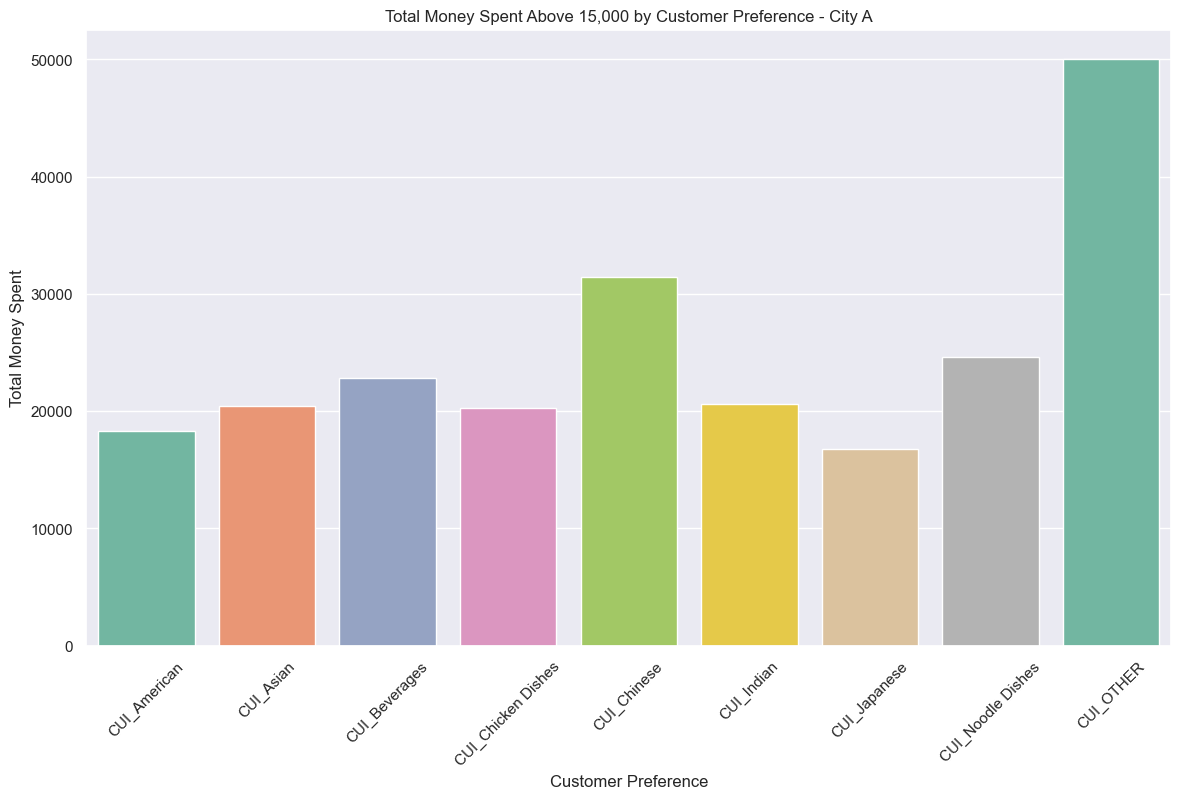

In [65]:
# Suppress specific warning related to the palette
warnings.filterwarnings('ignore', category=UserWarning, message='Passing `palette` without assigning `hue` is deprecated')

# Filter data for City A
city_a_data = df[df['Customer_City'] == 'City A']

# Group the data by 'Customer_preference' to get the total money_spent for City A
money_spent_by_preference_city_a = city_a_data.groupby(['Customer_preference'], as_index=False)['money_spent'].sum()

# Filter the data where money_spent is greater than 15,000
above_15k_a = money_spent_by_preference_city_a[money_spent_by_preference_city_a['money_spent'] > 15000]

# Plotting the bar chart for money_spent > 15,000 for City A
plt.figure(figsize=(14, 8))
sns.barplot(data=above_15k_a, x='Customer_preference', y='money_spent', hue='Customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Above 15,000 by Customer Preference - City A')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()


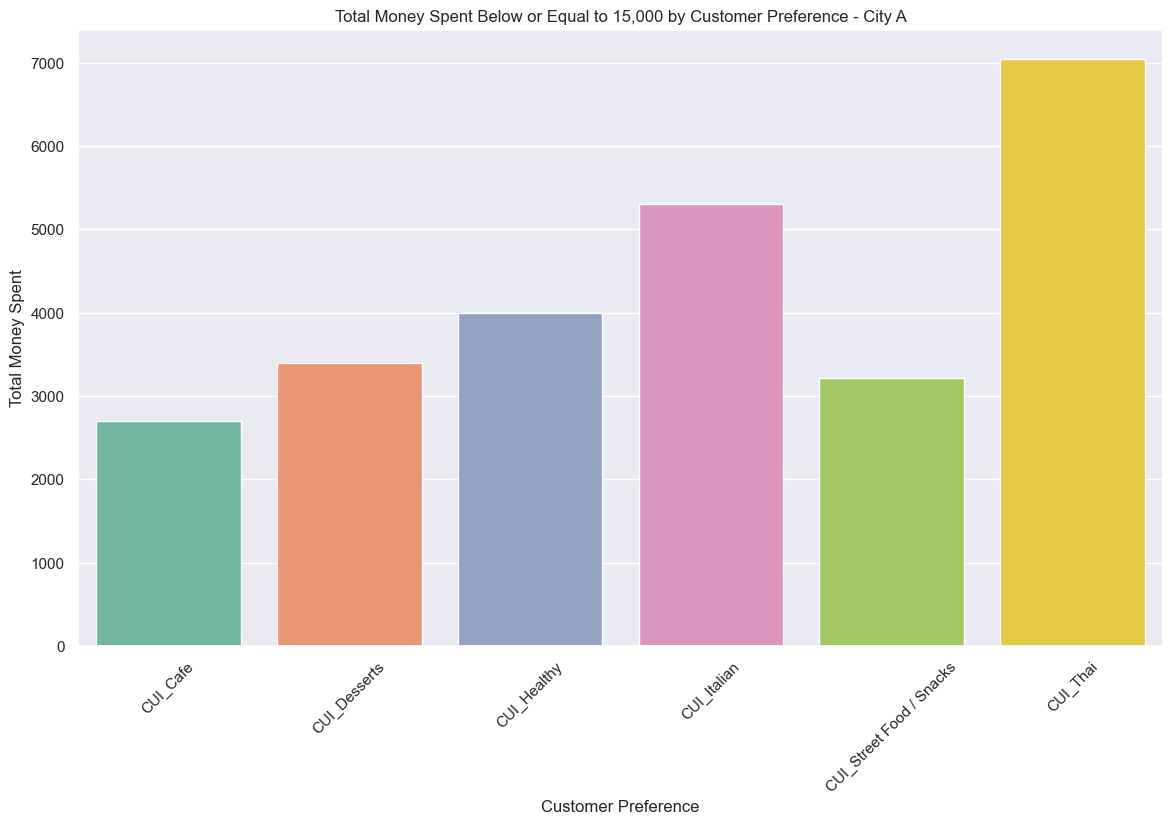

In [66]:
# Suppress specific warning related to the palette
warnings.filterwarnings('ignore', category=UserWarning, message='Passing `palette` without assigning `hue` is deprecated')

# Filter data for City A
city_a_data = df[df['Customer_City'] == 'City A']

# Group the data by 'Customer_preference' to get the total money_spent for City A
money_spent_by_preference_city_a = city_a_data.groupby(['Customer_preference'], as_index=False)['money_spent'].sum()

# Filter the data where money_spent is less than or equal to 15,000
below_15k_a = money_spent_by_preference_city_a[money_spent_by_preference_city_a['money_spent'] <= 15000]

# Plotting the bar chart for money_spent <= 15,000 for City A
plt.figure(figsize=(14, 8))
sns.barplot(data=below_15k_a, x='Customer_preference', y='money_spent', hue='Customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Below or Equal to 15,000 by Customer Preference - City A')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()


## City B

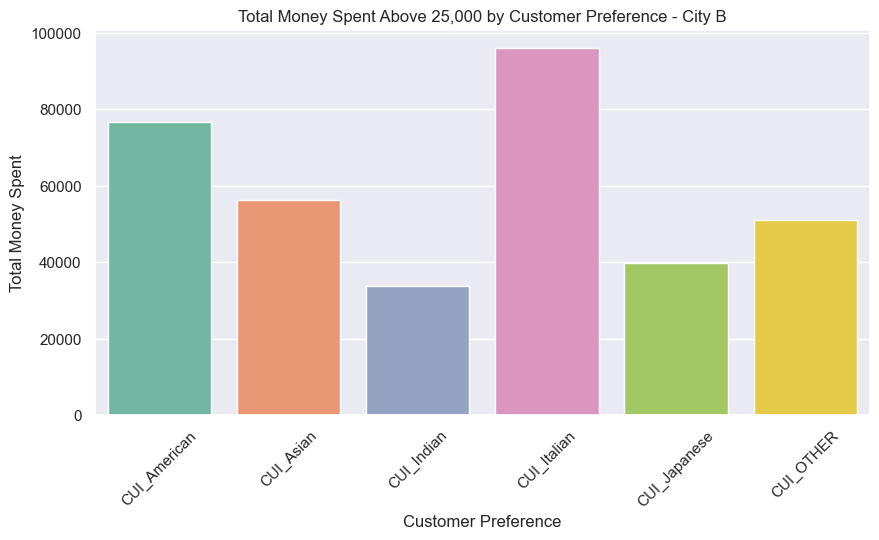

In [67]:
# Suppress specific warning related to the palette
warnings.filterwarnings('ignore', category=UserWarning, message='Passing `palette` without assigning `hue` is deprecated')

# Filter data for City B
city_b_data = df[df['Customer_City'] == 'City B']

# Group the data by 'Customer_preference' to get the total money_spent for City B
money_spent_by_preference_city_b = city_b_data.groupby(['Customer_preference'], as_index=False)['money_spent'].sum()

# Filter the data where money_spent is greater than 25,000
above_25k_b = money_spent_by_preference_city_b[money_spent_by_preference_city_b['money_spent'] > 25000]

# Plotting the bar chart for money_spent > 25,000 for City B
plt.figure(figsize=(10, 5))
sns.barplot(data=above_25k_b, x='Customer_preference', y='money_spent', hue='Customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Above 25,000 by Customer Preference - City B')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

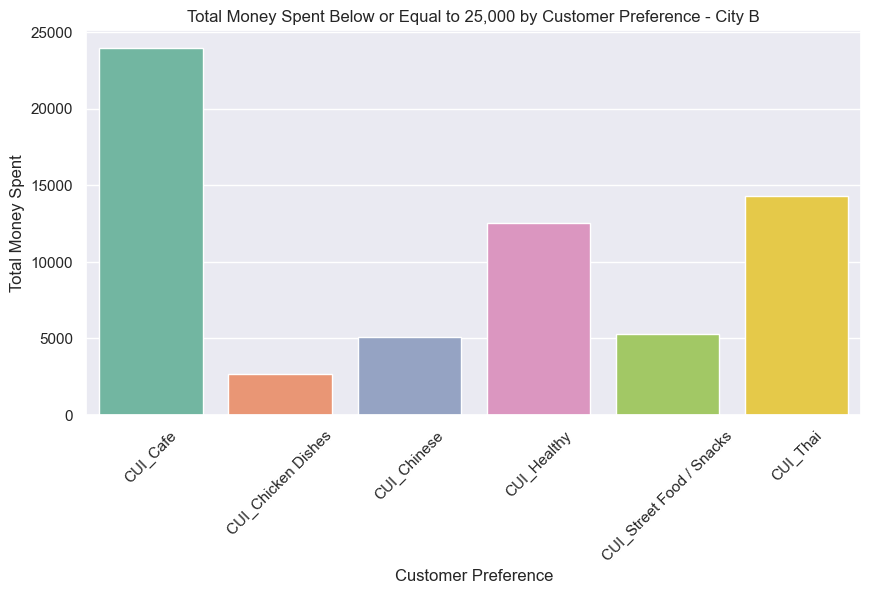

In [68]:
# Suppress specific warning related to the palette
warnings.filterwarnings('ignore', category=UserWarning, message='Passing `palette` without assigning `hue` is deprecated')

# Filter data for City B
city_b_data = df[df['Customer_City'] == 'City B']

# Group the data by 'Customer_preference' to get the total money_spent for City B
money_spent_by_preference_city_b = city_b_data.groupby(['Customer_preference'], as_index=False)['money_spent'].sum()

# Filter the data where money_spent is less than or equal to 25,000
below_25k_b = money_spent_by_preference_city_b[money_spent_by_preference_city_b['money_spent'] <= 25000]

# Plotting the bar chart for money_spent <= 25,000 for City B
plt.figure(figsize=(10, 5))
sns.barplot(data=below_25k_b, x='Customer_preference', y='money_spent', hue='Customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Below or Equal to 25,000 by Customer Preference - City B')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

## City C

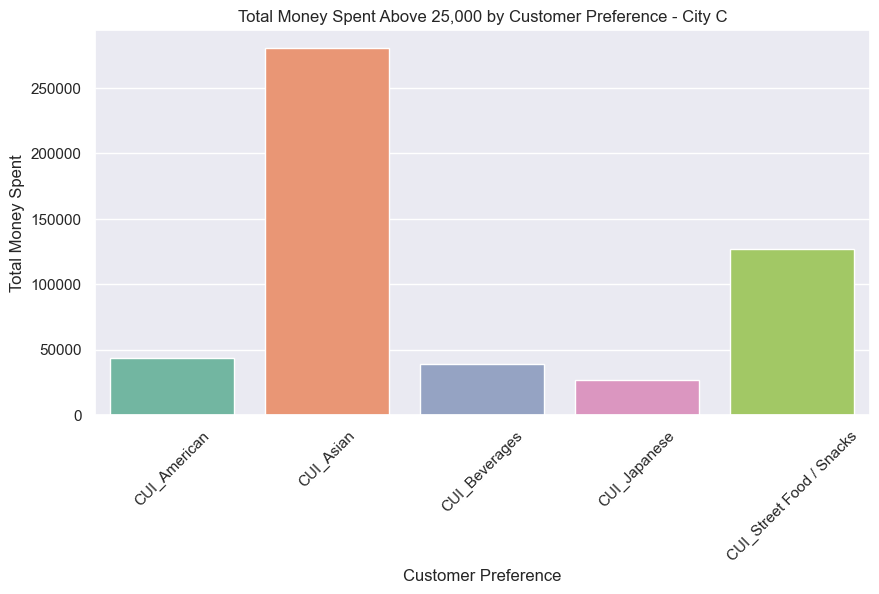

In [69]:
# Filter data for City C
city_c_data = df[df['Customer_City'] == 'City C']

# Group the data by 'Customer_preference' to get the total money_spent for City C
money_spent_by_preference_city_c = city_c_data.groupby(['Customer_preference'], as_index=False)['money_spent'].sum()

# Filter the data where money_spent is greater than 25,000
above_25k = money_spent_by_preference_city_c[money_spent_by_preference_city_c['money_spent'] > 25000]

# Plotting the bar chart for money_spent > 25,000
plt.figure(figsize=(10, 5))
sns.barplot(data=above_25k, x='Customer_preference', y='money_spent', palette='Set2')
plt.title('Total Money Spent Above 25,000 by Customer Preference - City C')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

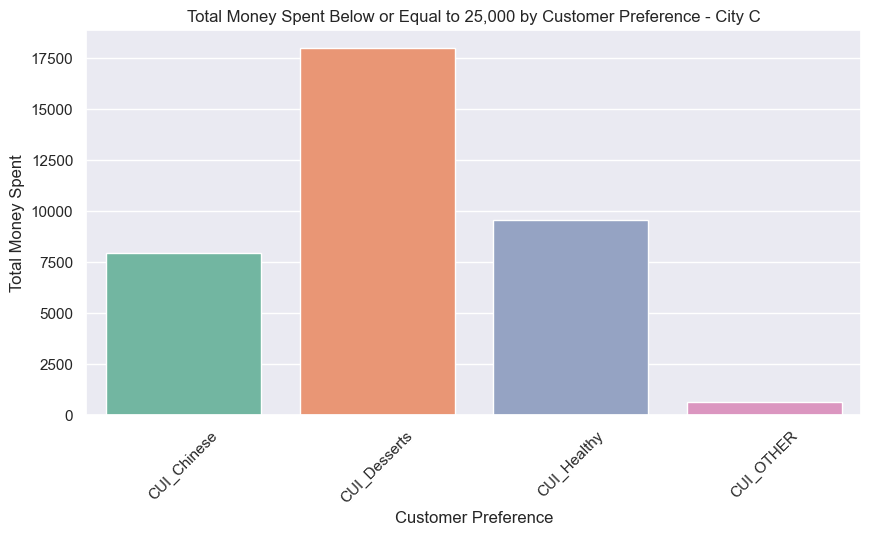

In [70]:
# Filter data for City C
city_c_data = df[df['Customer_City'] == 'City C']

# Group the data by 'Customer_preference' to get the total money_spent for City C
money_spent_by_preference_city_c = city_c_data.groupby(['Customer_preference'], as_index=False)['money_spent'].sum()

# Filter the data where money_spent is less than or equal to 25,000
below_25k = money_spent_by_preference_city_c[money_spent_by_preference_city_c['money_spent'] <= 25000]

# Plotting the bar chart for money_spent <= 25,000
plt.figure(figsize=(10, 5))
sns.barplot(data=below_25k, x='Customer_preference', y='money_spent', palette='Set2')
plt.title('Total Money Spent Below or Equal to 25,000 by Customer Preference - City C')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

# 9. Numerical/Categorical partition

`Step 1` Confirm there are no missing values

In [71]:
df.isna().sum()

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

`Step 2` Check features datatypes

In [72]:
df.dtypes

customer_id                   object
customer_region               object
customer_age                   int64
vendor_count                   int64
product_count                  int64
is_chain                      object
first_order                    int64
last_order                     int64
last_promo                    object
payment_method                object
CUI_American                 float64
CUI_Asian                    float64
CUI_Beverages                float64
CUI_Cafe                     float64
CUI_Chicken Dishes           float64
CUI_Chinese                  float64
CUI_Desserts                 float64
CUI_Healthy                  float64
CUI_Indian                   float64
CUI_Italian                  float64
CUI_Japanese                 float64
CUI_Noodle Dishes            float64
CUI_OTHER                    float64
CUI_Street Food / Snacks     float64
CUI_Thai                     float64
DOW_0                          int64
DOW_1                          int64
D

In [73]:
#List of features to convert to object
object_columns=['customer_region','is_chain','age_group']

In [74]:
for dataset in [df]:
    dataset[object_columns] = dataset[object_columns].astype('object')

**`Define numerical and categorical data`**

In [75]:
# NUM
df_num = df.select_dtypes(include=['number'])

#CAT
df_cat = df.select_dtypes(exclude=np.number)

In [76]:
df_cat = df_cat.drop(columns=['customer_id'])

# 10.Scaling Numerical features

In [77]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_num)

# Convert back to a DataFrame (if needed) with original column names
scaled_df = pd.DataFrame(scaled_data, columns=df_num.columns)

In [78]:
original_column_names = df_num.columns
scaled_data = pd.DataFrame(data=scaled_data, columns=original_column_names)

In [79]:
scaled_data.head()

,customer_age,vendor_count,product_count,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_client,money_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,Frequency
0,0.046154,0.025,0.018587,0.0,0.011111,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.093442,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.205357,0.020106,0.010753,0.135354,0.000000,0.000000,0.038462,0.0,0.010753
1,0.030769,0.025,0.007435,0.0,0.011111,0.045751,0.007126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.04,0.027778,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.205357,0.013287,0.010753,0.088841,0.027778,0.000000,0.000000,0.0,0.010753
2,0.353846,0.000,0.007435,0.0,0.011111,0.032833,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,0.00,0.027778,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.205357,0.006227,0.010753,0.040693,0.027778,0.000000,0.000000,0.0,0.010753
3,0.169231,0.025,0.011152,0.0,0.022222,0.000000,0.015278,0.0,0.0,0.0,0.0,0.0,0.0,0.057786,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.058824,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.027778,0.0,0.0,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.214286,0.021996,0.010753,0.148244,0.013889,0.019231,0.000000,0.0,0.010753
4,0.076923,0.025,0.018587,0.0,0.022222,0.051997,0.045578,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.058824,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019231,0.043478,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.214286,0.038837,0.010753,0.263107,0.027778,0.000000,0.000000,0.0,0.010753


# 11. Clustering 

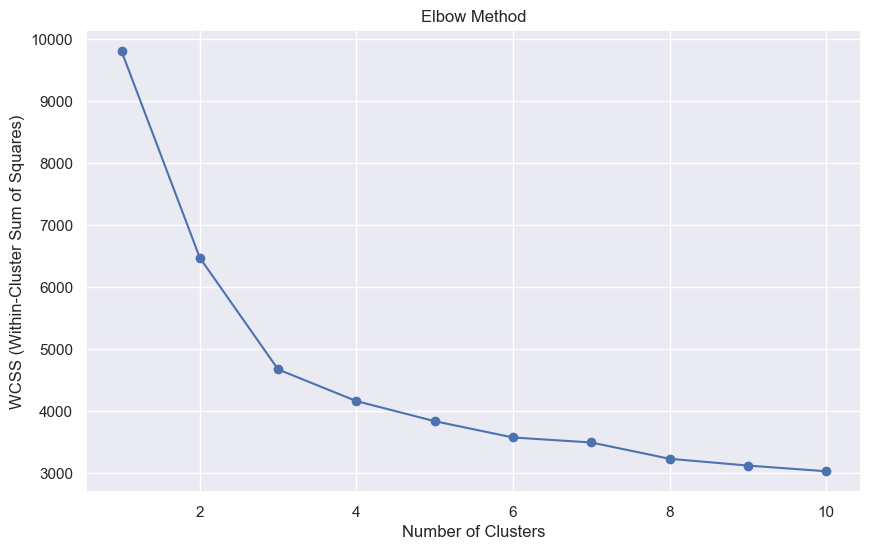

In [80]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

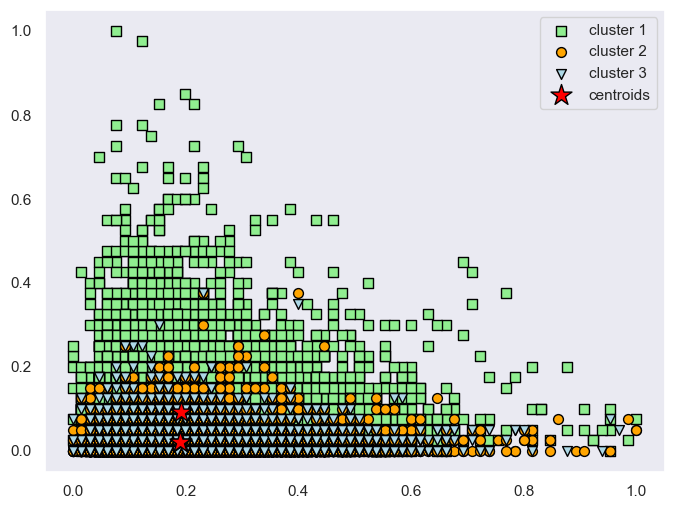

In [ ]:
# Ensure scaled_data is a NumPy array
scaled_data = np.array(scaled_data)

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
y_pred = kmeans.predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Cluster 1
plt.scatter(scaled_data[y_pred == 0, 0], scaled_data[y_pred == 0, 1],
            s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')

# Cluster 2
plt.scatter(scaled_data[y_pred == 1, 0], scaled_data[y_pred == 1, 1],
            s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')

# Cluster 3
plt.scatter(scaled_data[y_pred == 2, 0], scaled_data[y_pred == 2, 1],
            s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

# Cluster Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')

plt.legend()
plt.grid()
plt.show()

In [90]:
#See the amount of customers in each cluster
df['Cluster'].value_counts()

Cluster
0    14119
1     9321
2     8297
Name: count, dtype: int64